In [20]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_size=pd.read_csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv")
df_iter=pd.read_csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv")

In [4]:
df_size.sample()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE


In [5]:
df_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df_iter.sample()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN


In [7]:
df_iter.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [8]:
df_iter=df_iter.drop(columns=["Comments"])

In [9]:
df_iter=df_iter.dropna(how="any",axis=0)
df_size=df_size.dropna(how="any",axis=0)

In [10]:
df_size.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
df_size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
label_encoder=LabelEncoder()
for i in df_size.columns:
    if df_size[i].dtype=="object":
        df_size[i]=label_encoder.fit_transform(df_size[i])
for j in df_iter.columns:
    if df_iter[j].dtype=="object":
        df_iter[j]=label_encoder.fit_transform(df_iter[j])

In [13]:
df_iter

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,0,0,2,0,23,1,3,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
2,0,3,0,0,2,0,43,1,15,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,0,5,0,0,2,0,65,1,15,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426
5,0,6,0,0,2,0,66,1,15,39.3,20.6,190.0,3650.0,2,8.66496,-25.29805
6,0,7,0,0,2,0,87,0,12,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2,119,2,0,0,0,61,0,48,47.2,13.7,214.0,4925.0,1,7.99184,-26.20538
340,2,121,2,0,0,0,63,1,28,46.8,14.3,215.0,4850.0,1,8.41151,-26.13832
341,2,122,2,0,0,0,64,1,28,50.4,15.7,222.0,5750.0,2,8.30166,-26.04117
342,2,123,2,0,0,0,73,1,28,45.2,14.8,212.0,5200.0,1,8.24246,-26.11969


In [14]:
df_size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


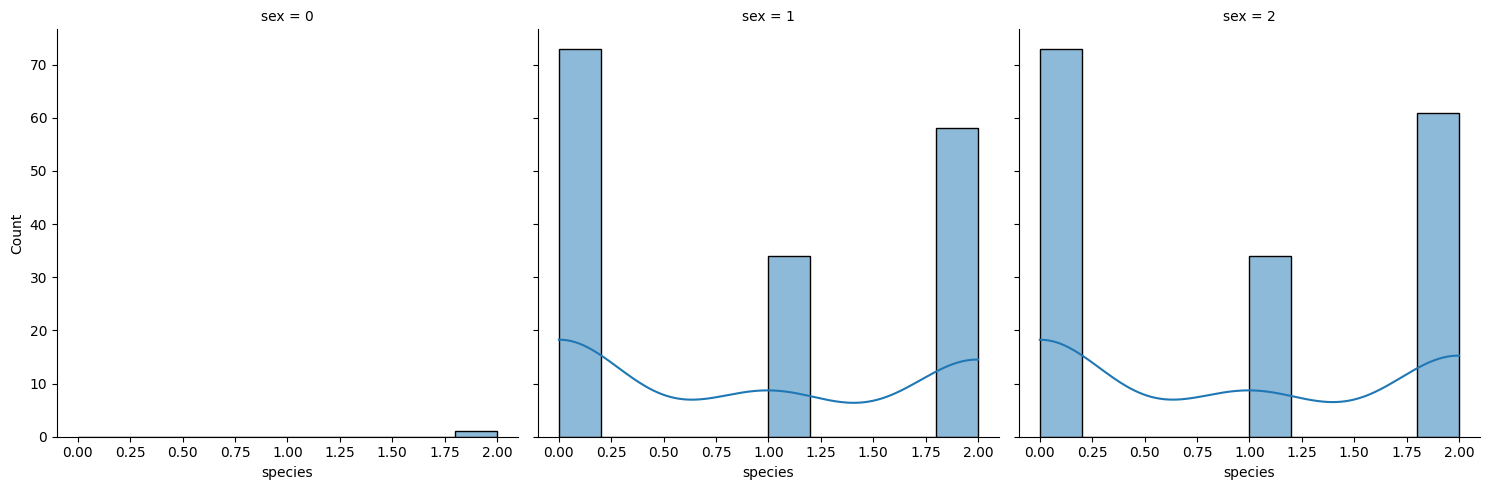

In [15]:
sns.displot(data=df_size, x="species", col="sex", kde=True)

<Axes: xlabel='Species', ylabel='Count'>

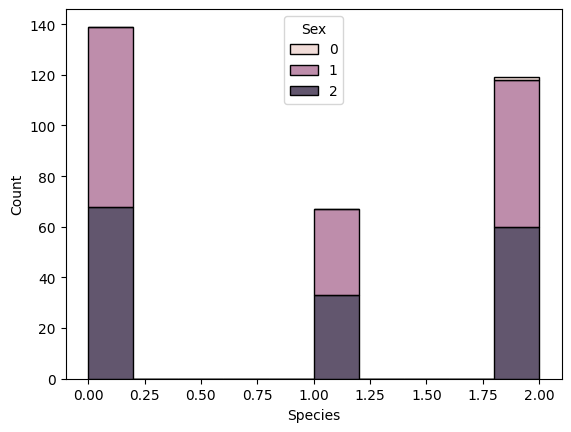

In [18]:
# penguins = sns.load_dataset("penguins")
sns.histplot(data=df_iter, x="Species", hue="Sex", multiple="stack")

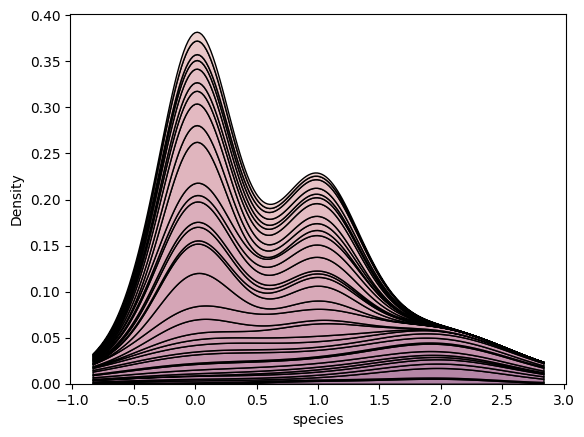

In [26]:
sns.kdeplot(data=df_size, x="species", hue="body_mass_g", multiple="stack")
plt.legend().set_visible(False)
plt.show()

In [28]:
df_iter.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

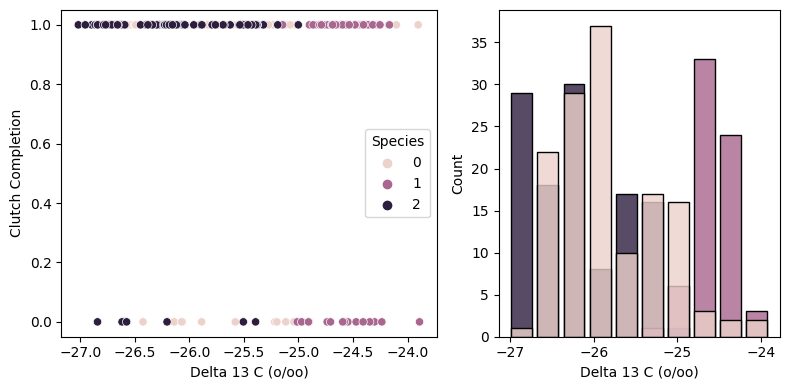

In [29]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df_iter, x="Delta 13 C (o/oo)", y="Clutch Completion", hue="Species", ax=axs[0])
sns.histplot(data=df_iter, x="Delta 13 C (o/oo)", hue="Species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

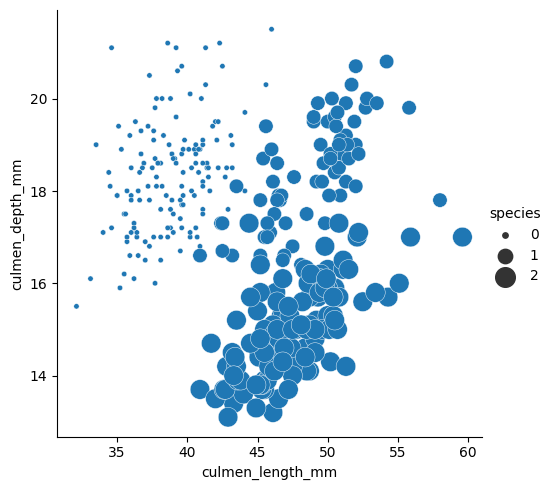

In [31]:
sns.relplot(
    data=df_size, x="culmen_length_mm", y="culmen_depth_mm",
    size="species", sizes=(15, 200)
)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

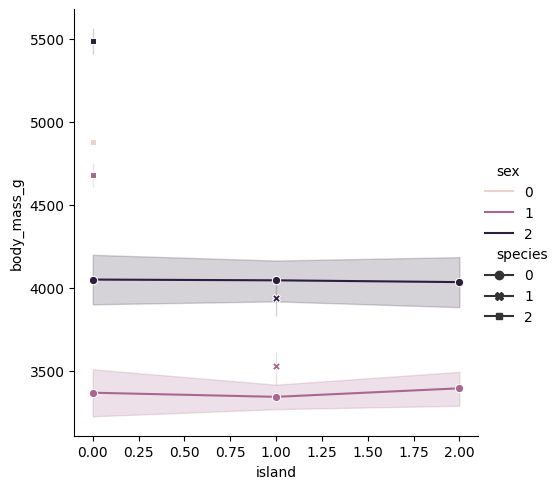

In [35]:
sns.relplot(
    data=df_size, kind="line",
    x="island", y="body_mass_g", hue="sex", style="species",
    dashes=False, markers=True,
)

In [36]:
df_size.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

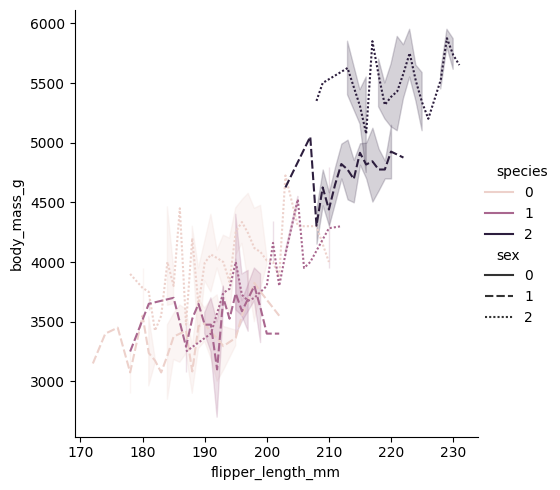

In [40]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=df_size, kind="line",
    x="flipper_length_mm", y="body_mass_g",
    hue="species", style="sex"

)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

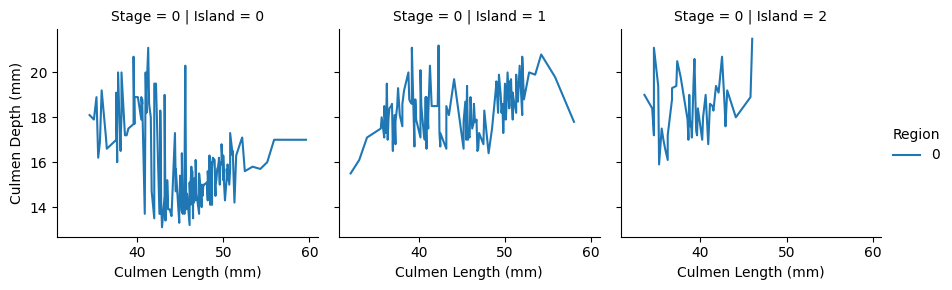

In [42]:
sns.relplot(
    data=df_iter, kind="line",
    x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Region",
    col="Island", row="Stage", height=3,
    estimator=None
)

In [43]:
df_iter.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

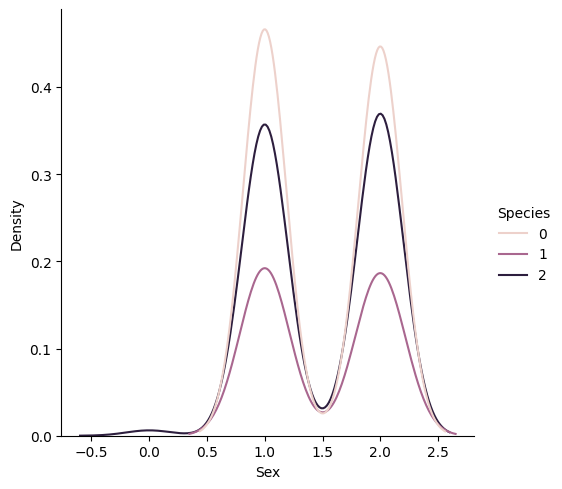

In [44]:
sns.displot(df_iter, x="Sex", hue="Species", kind="kde")

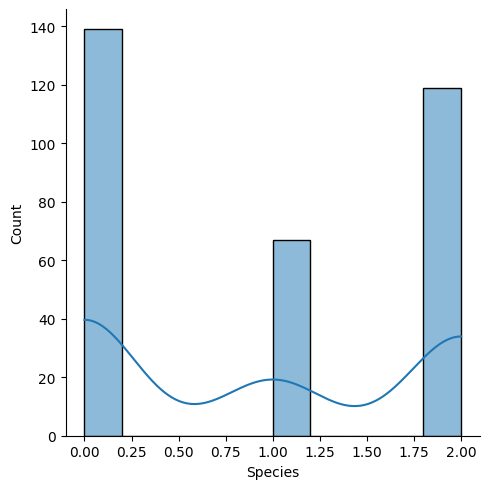

In [45]:
sns.displot(df_iter, x="Species", kde=True)

In [46]:
df_iter.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

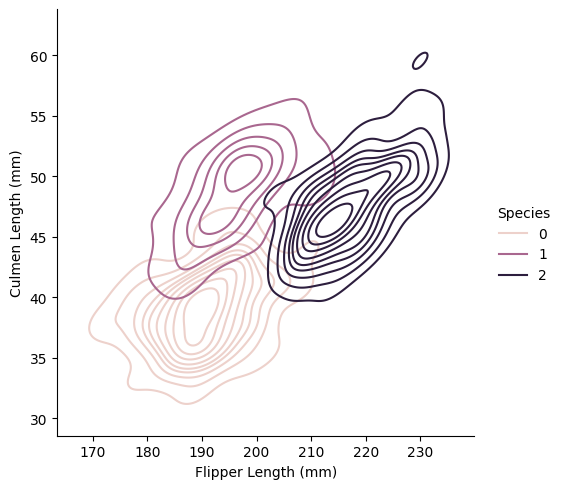

In [47]:
sns.displot(df_iter, x="Flipper Length (mm)", y="Culmen Length (mm)", hue="Species", kind="kde")

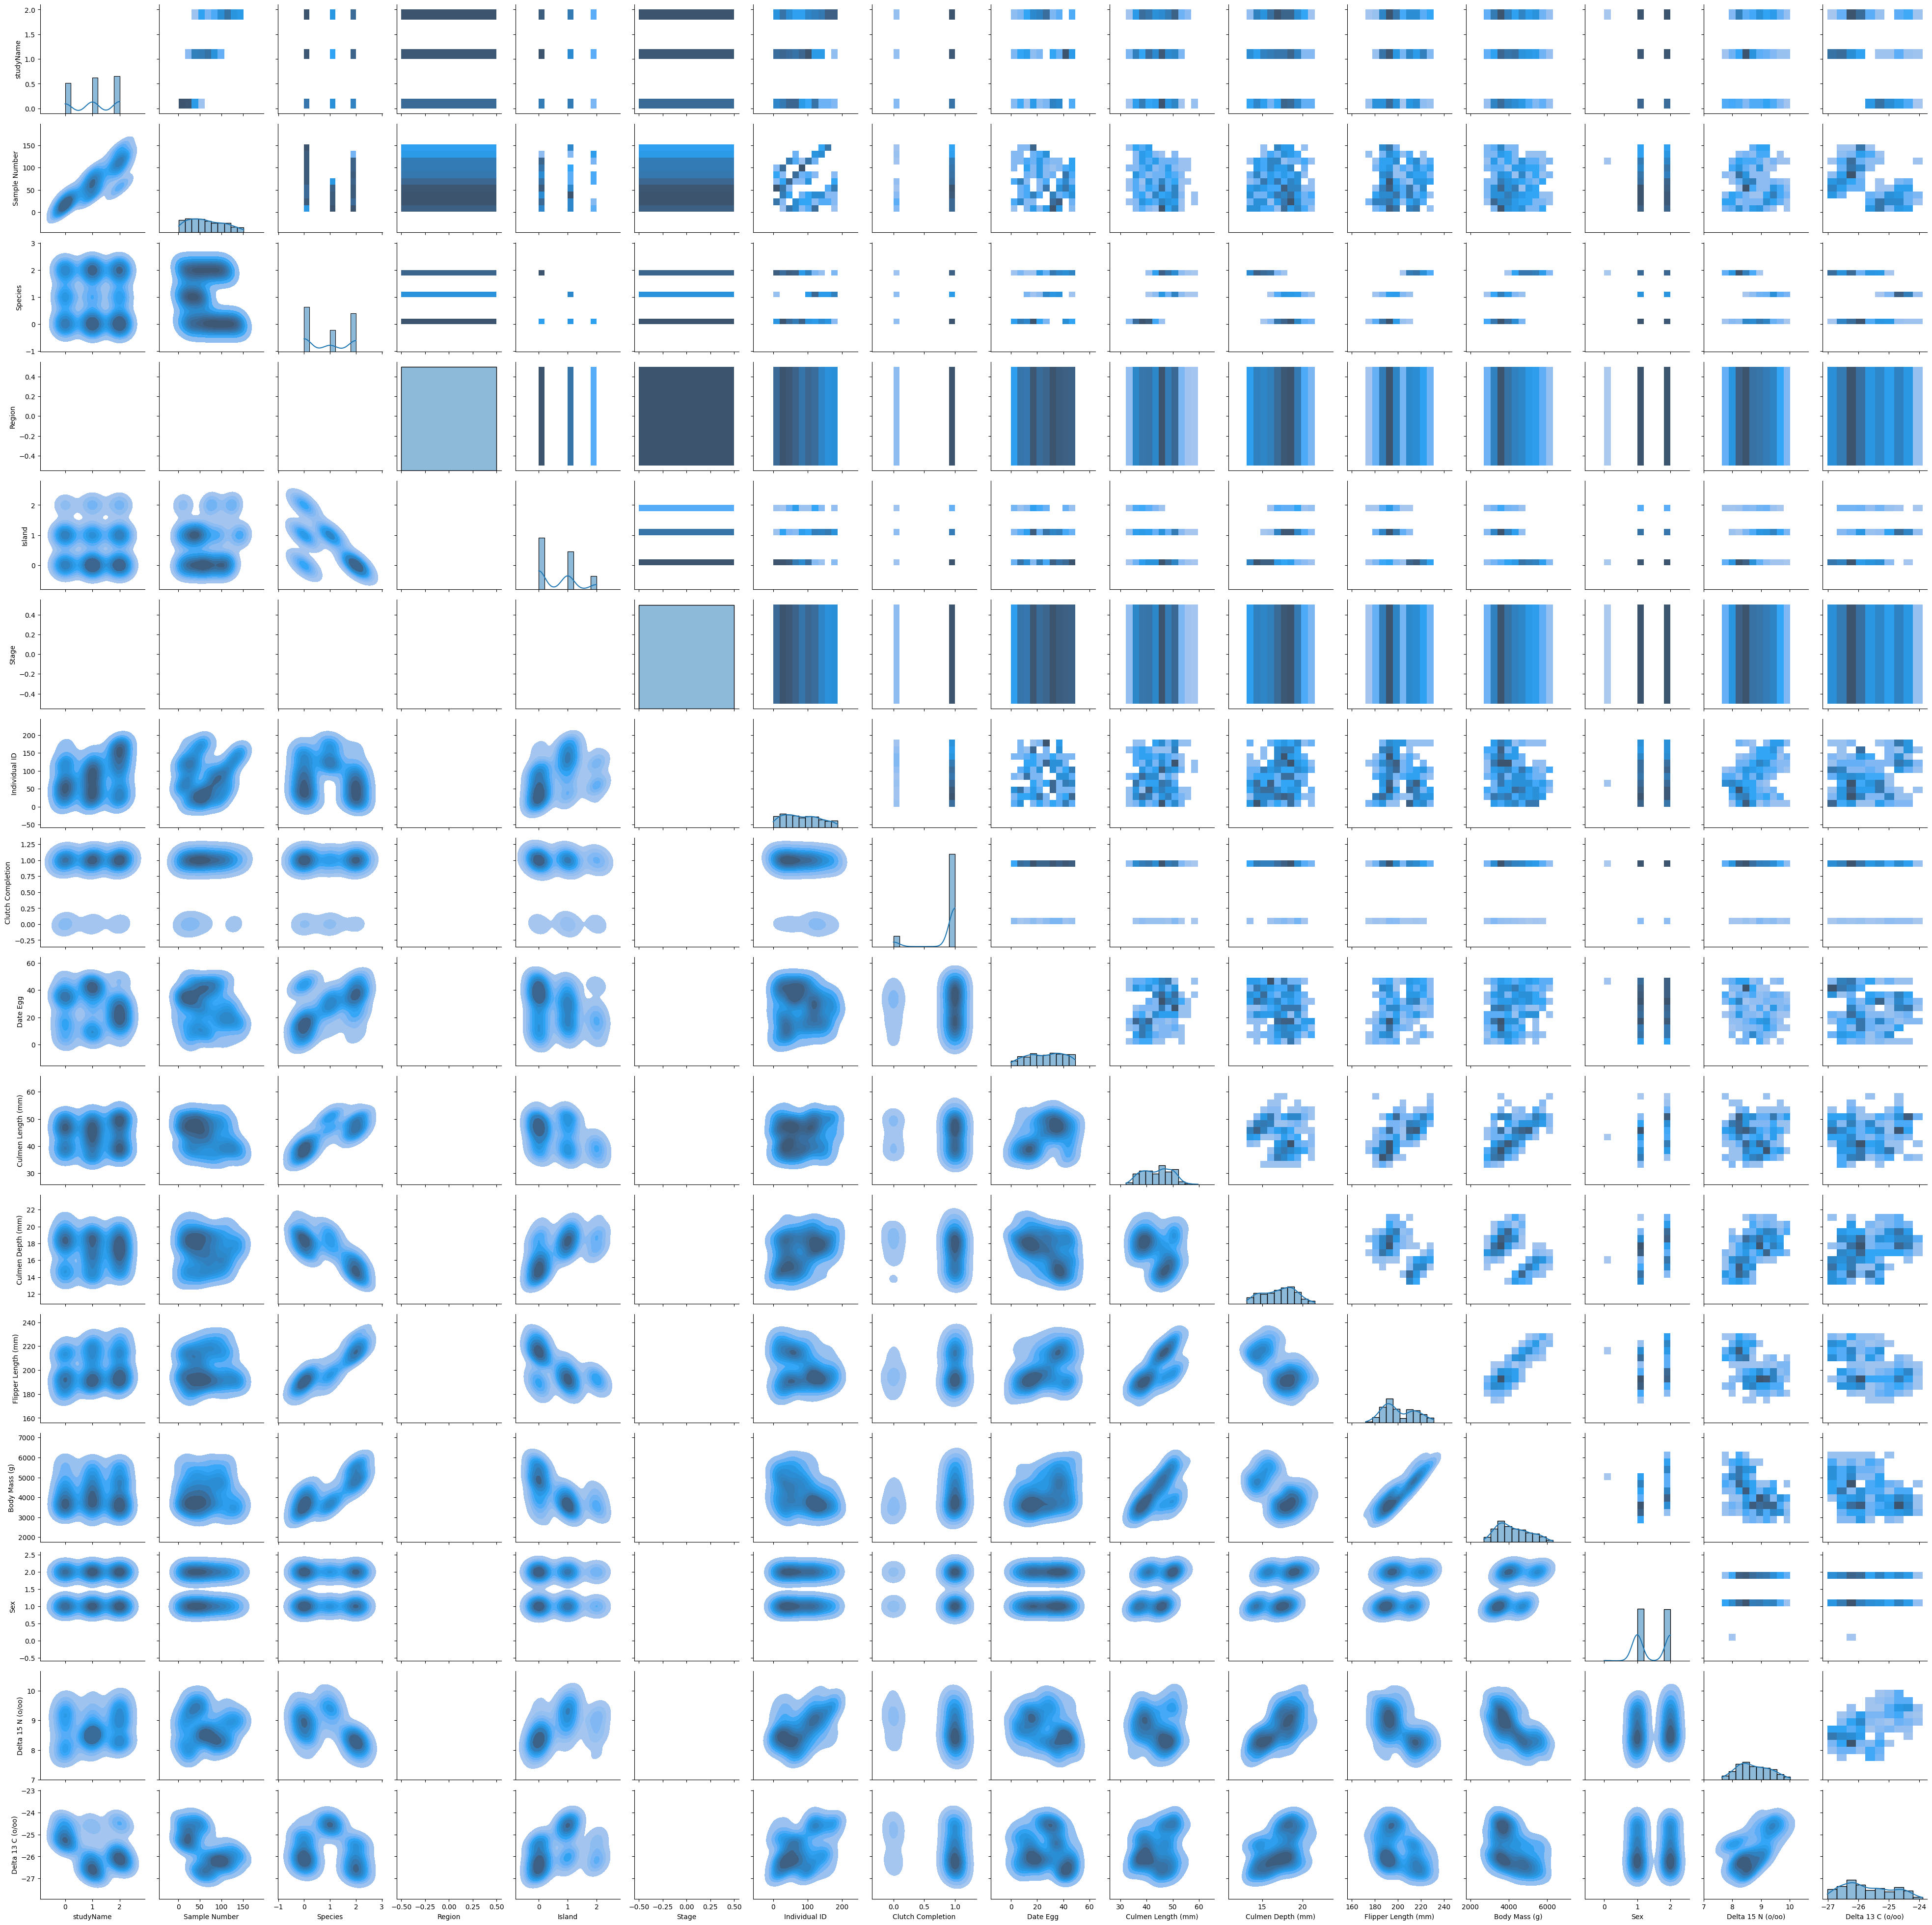

In [48]:
g = sns.PairGrid(df_iter)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

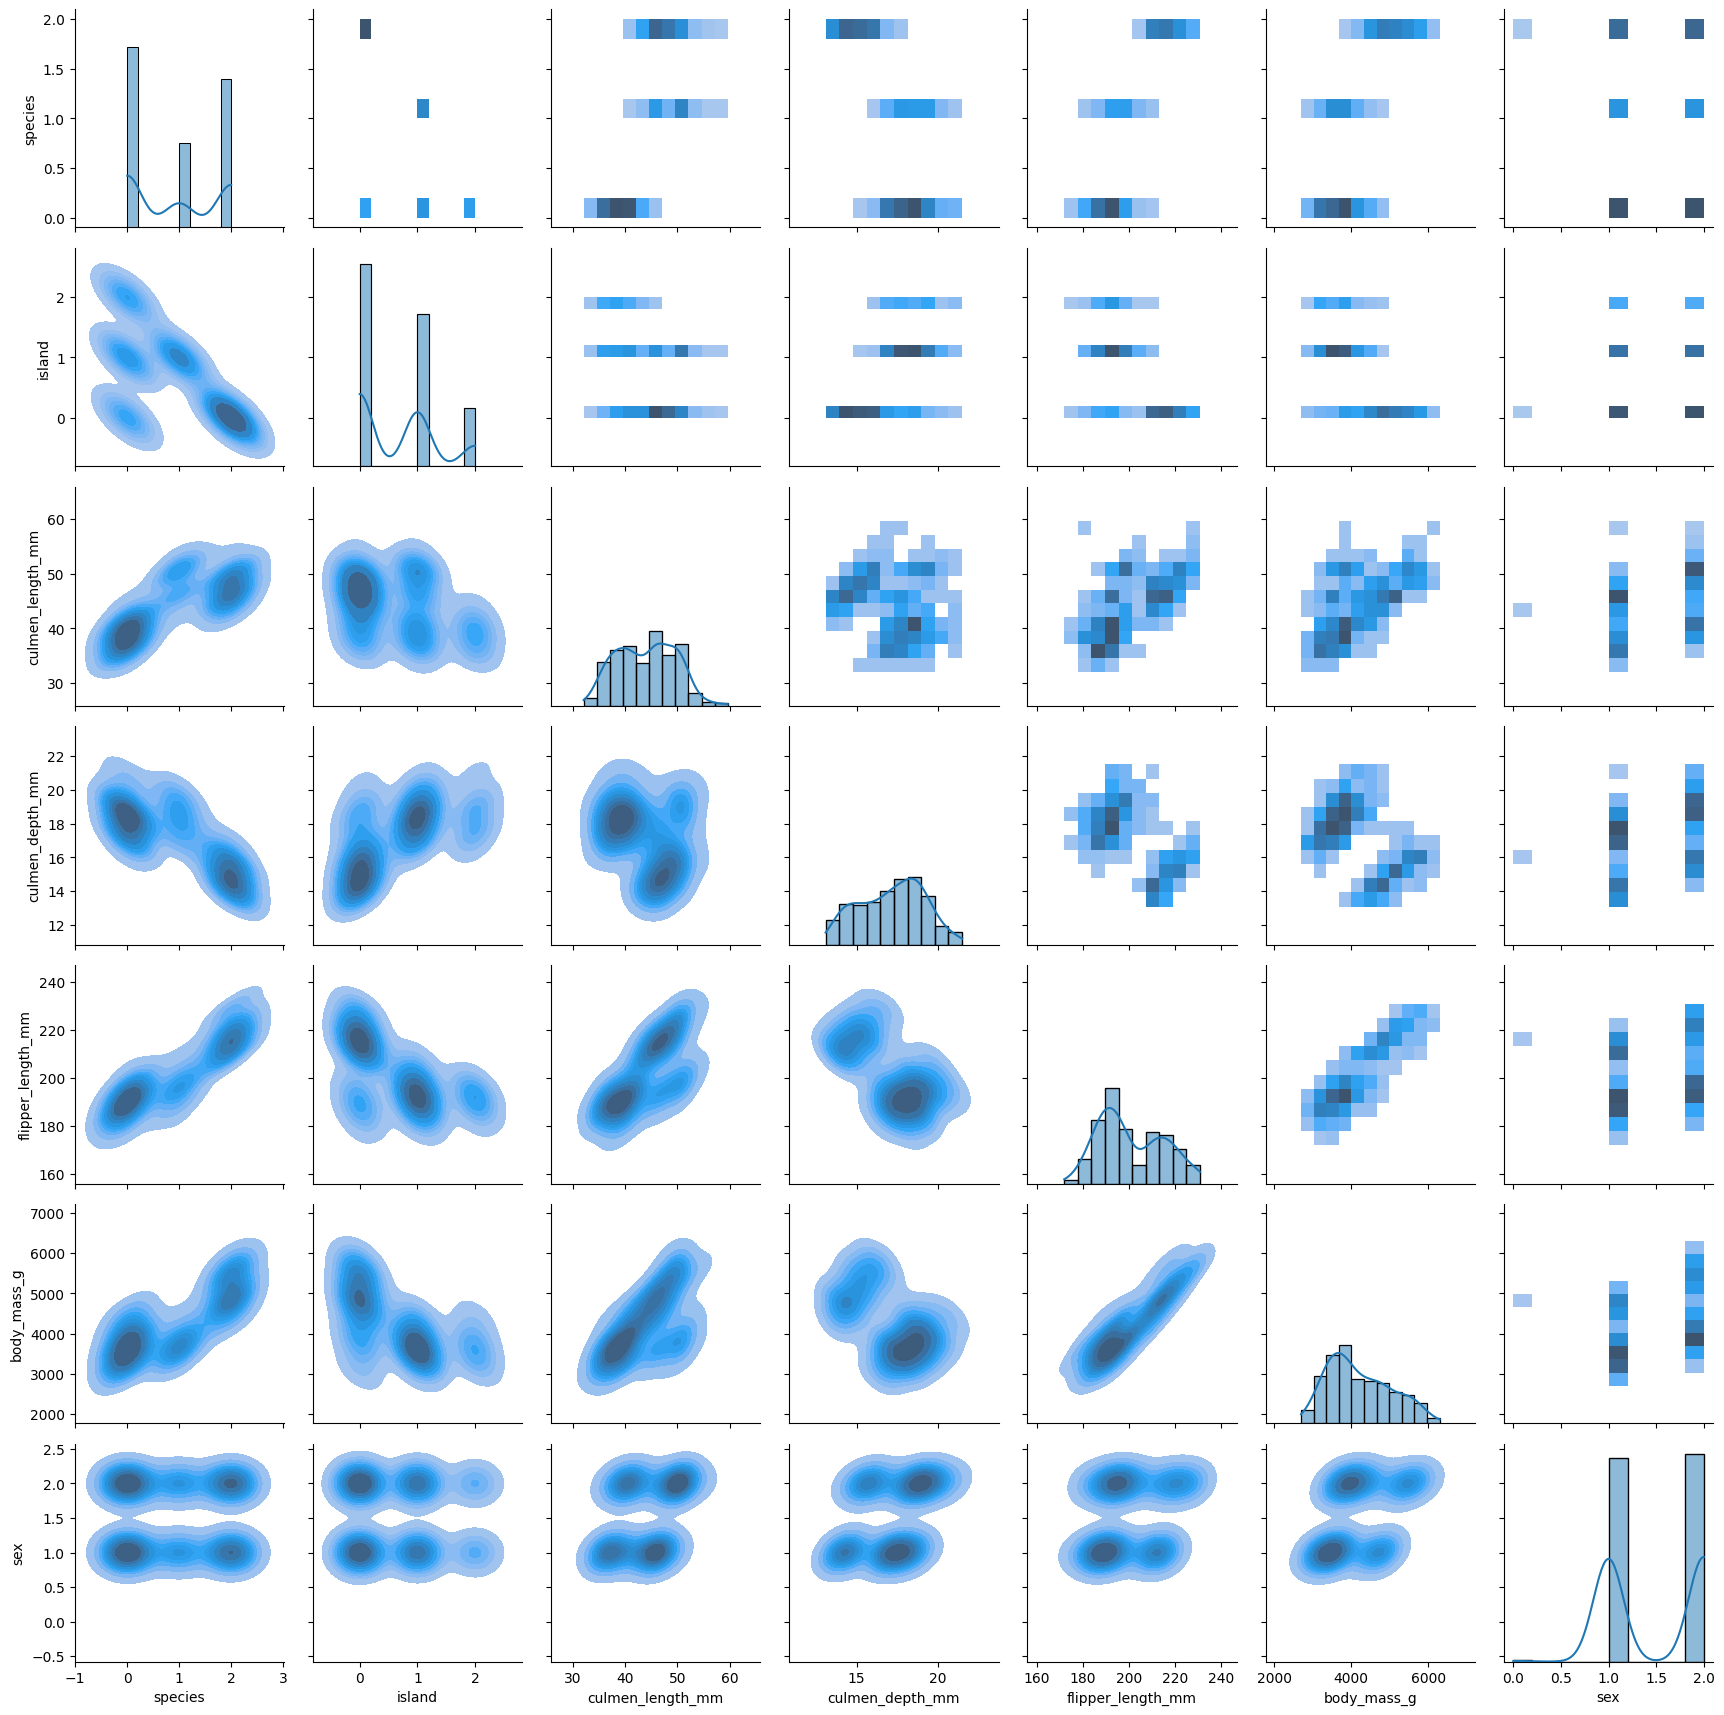

In [49]:
g = sns.PairGrid(df_size)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [54]:
df_size.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

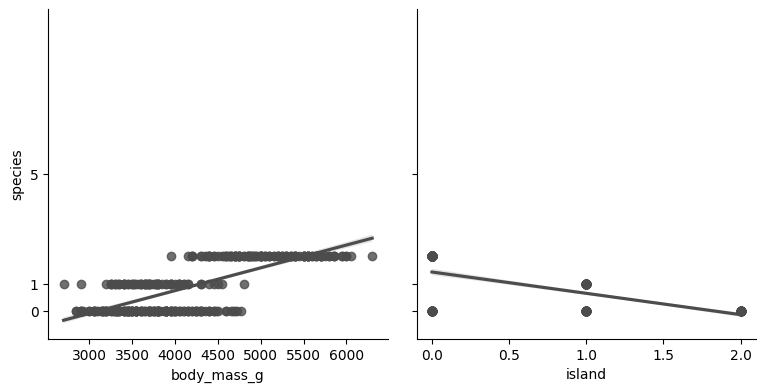

In [59]:
g = sns.PairGrid(df_size, y_vars=["species"], x_vars=["body_mass_g", "island"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 1, 5])

<Axes: >

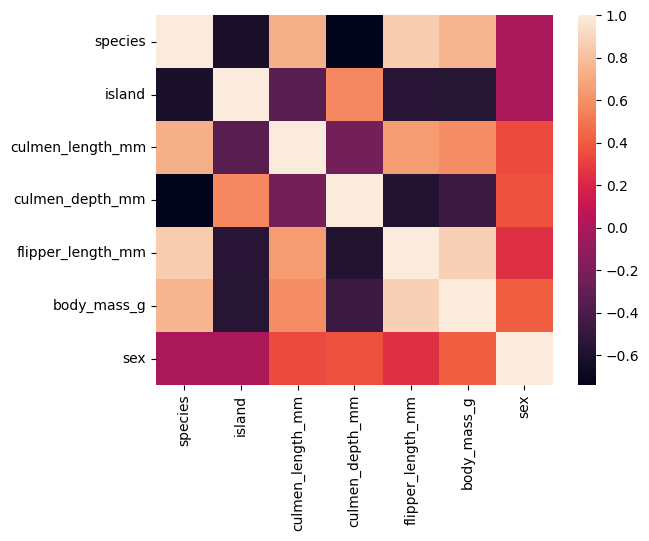

In [60]:
sns.heatmap(df_size.corr())

<Axes: >

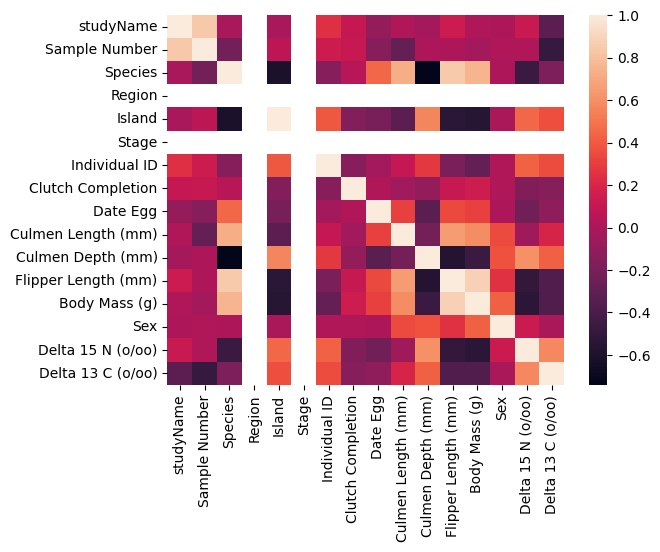

In [61]:
sns.heatmap(df_iter.corr())